## Exploratory data visualization

Seasonality, scatter plots, and correlation

We'll use time series data about bike sharing. Recall that a time series is a series of data points listed in time order.

Our dataset describes the daily activity of Capital Bikeshare, a bike-sharing company.

In [1]:
import pandas as pd
bike_sharing = pd.read_csv('/Users/brindhamanivannan/datasets/day.csv')
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [2]:
bike_sharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## Explore data using data visualization methods

Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on:

- dteday: date in year-month-day format.
- temp: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
- atemp: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
- hum: normalized humidity.
- windspeed: normalized wind speed.
- casual: the number of casual (non-registered) people who rented a bike that day.
- registered: the number of registered people who rented a bike that day (registered people bought a membership).
- cnt: the total number of people who rented a bike (casual plus registered).




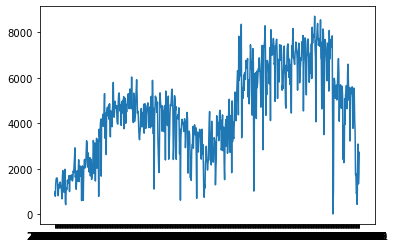

In [4]:
import matplotlib.pyplot as plt
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

One of the first things that draws our attention above is the two black bands at the bottom. This is related to the data type of the dteday column — the data type is object, which is the pandas equivalent of a string.

When we pass a series of strings to plt.plot(), Matplotlib doesn't know how to handle that very well. If the strings are convertible, it's better to convert them explicitly to either a numerical data type or a datetime.

With pandas, we can use the pd.to_datetime() function to make the conversion.

In [5]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

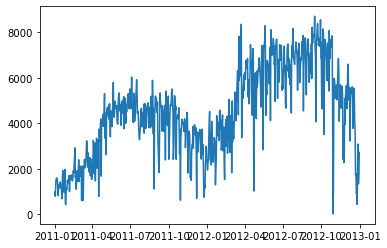

In [6]:
import matplotlib.pyplot as plt
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

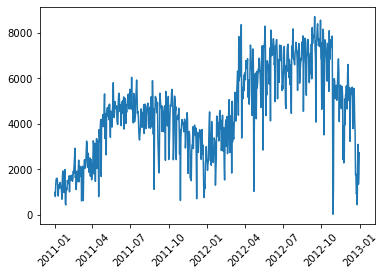

In [7]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.show()

## Seasonal trends

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).

In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rented bikes:

- The number keeps increasing in the January-May interval.
- We see a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).
- The number keeps decreasing in the September-December interval.

We call all of these similarities seasonal trends. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this seasonality.

Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

Identifying seasonality can be useful for businesses:

- They can plan marketing campaigns at the right time.
- They don't need to panic needlessly when the sales are decreasing as a result of seasonality.
- They can hire extra employees right before the period of high activity begins.

In our case, what could be causing the seasonality in the number of rented bikes?

Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2011 and 2012.

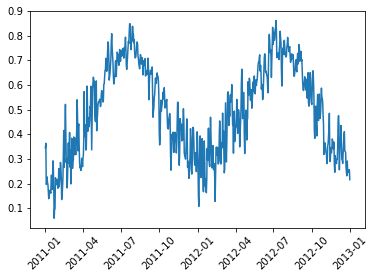

In [8]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()


Above, we plotted cnt and temp against dteday. To visualize the relationship between cnt and temp, it's better if we plot one against the other, and leave out the dteday column. We can do this with a scatter plot (also known as scatter graph or scatter chart).

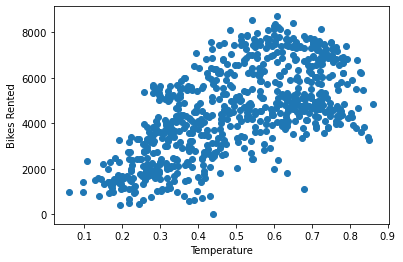

In [9]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

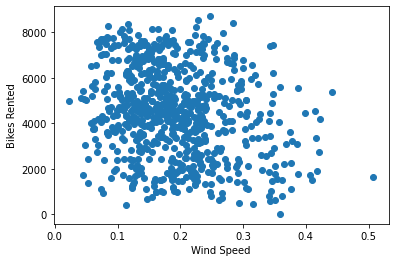

In [10]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()


## Correlation

The general direction of the points (seen from left to right) is different on the two plots above:

- temp versus cnt shows an upward trend
- windspeed versus cnt shows a downward trend (approximately)

Both the temp and the windpseed columns relate to the cnt column, but in a different way.

When the values in temp increase, the values in cnt tend to go up as well (and vice versa). When the values in temp decrease, the values in cnt tend to go down as well (and vice versa).

On the other side, when the values in windspeed increase, the values in cnt don't go up — they tend to decrease instead. When the values in windspeed decrease, the values in cnt tend to go up (and vice versa).

In a broad sense, when two columns are statistically related in a specific way and to a certain degree, we call this relationship correlation.

There are two kinds of correlation: positive and negative.

Two positively correlated columns tend to change in the same direction — when one increases (or decreases), the other tends to increase (or decrease) as well. On a scatter plot, two positively correlated columns show an upward trend (like in the temp versus cnt plot).



Two negatively correlated columns tend to change in opposite directions — when one increases, the other tends to decrease, and vice versa. On a scatter plot, two negatively correlated columns show a downward trend (like in the windspeed versus cnt plot).



Not all pairs of columns are correlated. We often see two columns changing together in a way that shows no clear pattern. The values in the columns increase and decrease without any correlation.

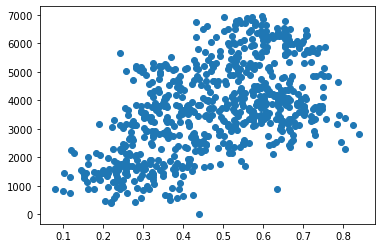

In [11]:
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
plt.show()


These two variables (columns) 'atemp' and 'registered' are positively correlated.

## Pearson correlation coefficient — also known as Pearson's r

The most popular way to measure correlation strength is by calculating the degree to which the points on a scatter plot fit on a straight line.



We can measure how well the points fit on a straight line by using the Pearson correlation coefficient — also known as Pearson's r.

Pearson's r values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to -1.00. A value of 0.0 shows no correlation.

If columns X and Y have r = +0.8, and columns X and Z have r = -0.8, then the strength of these two correlations is equal. The minus sign only tells us that the correlation is negative, not that it is weaker.

For example, even though the number +0.2 is greater than -0.6, a -0.6 correlation is stronger compared to a +0.2 correlation.

When we compare correlation strengths, we need to ignore the signs and only look at the absolute r values. The sign only gives us the correlation's direction, not its strength.

## Measuring Pearson's r 

The correlation between the temp and cnt columns is +0.63, and the correlation between windspeed and cnt is -0.23.
How do we calculate this?

## Series.corr() method

In [12]:
bike_sharing['temp'].corr(bike_sharing['cnt'])

0.6274940090334918

In [13]:
bike_sharing['windspeed'].corr(bike_sharing['cnt'])

-0.23454499742167

In [14]:
bike_sharing['cnt'].corr(bike_sharing['temp'])

0.6274940090334918

In [15]:
bike_sharing['cnt'].corr(bike_sharing['windspeed'])

-0.23454499742167

Series.corr() uses a math formula that only works with numbers. This means that Series.corr() only works with numerical columns — if we use string or datetime columns, we'll get an error.

## How to interpret and visualize correlation

In [16]:
bike_sharing.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Most often, we're only interested in finding the correlation for just a few columns. For example, what if we only want to see the correlation for the cnt, casual, and registered columns? The DataFrame.corr() method returns a DataFrame, which means we can select the cnt, casual, and registered columns directly.



In [17]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


In [18]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

In [19]:
temp_atemp_corr

0.9917015532294641

In [20]:
wind_hum_corr

-0.2484890986437141

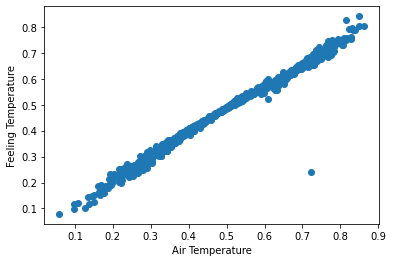

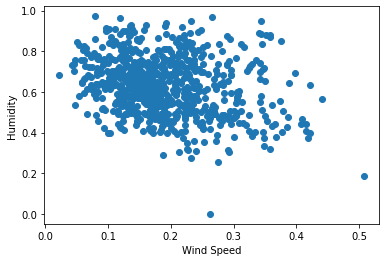

In [21]:
plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

## Categorical columns

One example of a categorical column (also called categorical variable) is the workingday column. This column describes the type of day: a working day or a non-working day (weekend or holiday).

In [22]:
bike_sharing['workingday']

0      0
1      0
2      1
3      1
4      1
      ..
726    1
727    1
728    0
729    0
730    1
Name: workingday, Length: 731, dtype: int64

In [23]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [24]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Although it's categorical, the workingday column is encoded with numbers (1 means a working day and 0 means a non-working day).

Because it's encoded with numbers, we can calculate correlations using Series.corr(). For instance, let's calculate its correlation with the casual and registered columns.

In [25]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

We can see a negative correlation with the casual column (-0.52), and a positive correlation with the registered column (+0.30).

These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time).

However, the 1 and 0 encoding is arbitrary. The creators of this dataset could have assigned 0 to a working day and 1 to a non-working day. Below, we make this change ourselves.

In [26]:
bike_sharing['workingday'].replace({1:0, 0:1}, inplace=True)

After we changed 1 to 0 and vice versa, the correlation strengths remained the same, but their sign changed (minus becomes plus and vice versa)

In [27]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual        0.518044
registered   -0.303907
Name: workingday, dtype: float64

If we are careful about what 1 and 0 mean, we reach the same conclusion as above (registered users tend to use the bikes more on working days, while casual users tend to ride the bikes more on the weekends and holidays).

The takeaway is that when we're working with categorical columns that have been encoded with numbers, we need to interpret the sign of the correlation with caution.

Because the encoding is arbitrary, the correlation can be both positive and negative, depending on how the creators of the dataset chose to encode the values of that column.

Often, the best thing we can do is acknowledge that there's a correlation but avoid talking about the correlation as being positive or negative.

Column weathersit is also categorical and has four unique values describing the weather.

1: clear or few clouds

2: mist or cloudy

3: light rain, light snow, thunderstorm

4: heavy rain, snow, ice pellets, fog

- The worse the weather, the higher the encoding number in the weathersit column.
- The correlation between weathersit and cnt is -0.30 (-ve - when one increases, the other tends to decrease) — this means that as the weather gets worse (high), the number of bike rentals tends to decrease. 
- The correlation between weathersit and hum is +0.59 (+ve - when one decreases, the other tends to decrease ) — this means that as the humidity decreases, the weather tends to get better(low).

## Correlation vs. Causation

When we find a strong correlation between two columns, one common mistake is to assume that the columns must also have a relationship of causality — one is the cause, and the other is the effect.

For instance, let's say we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.

The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly.

However, correlation can suggest causality. If two columns are correlated, it might be because of a cause-and-effect relationship. It might. To establish a relationship of causality, we often need to perform a rigorous experiment.

The overarching point is that proving causality requires more than just correlation. We can't say that X is the cause of Y simply because columns X and Y are strongly correlated. In other words, correlation does not imply causation.



## Learnings

- Seasonal trends and how to identify them using line graphs.
- Scatter plots and how to generate one using Matplotlib.
- How to visualize correlations using scatter plots.
- How to measure correlation using Pearson's r.
- How to interpret correlation values correctly.